# Pokemon Generation 1
Data From - https://pokeapi.co/docs/v2#pokemon-section
- webscraping
- pandas & numpy practice

In [40]:
import requests
import json
import time
import pandas as pd
import numpy as np

In [41]:
last_id = 152

# Pokemon Detail

In [42]:
pokemon = []
seperator = ','
for id in range(1,last_id):
    response = requests.get(f' https://pokeapi.co/api/v2/pokemon/{id}/')
    poke = response.json()
    poke_type = []
    for i in range (len(poke['types'])):
        poke_type.append(poke['types'][i]['type']['name'])
    pokemon.append([poke['id'], poke['name'], seperator.join(poke_type)])

    for i in range (len(poke['stats'])):
        pokemon[id-1].append(poke['stats'][i]['base_stat'])

    time.sleep(0.1)

In [43]:
pokedex = pd.DataFrame(pokemon, columns = ['id', 'name', 'type', 'hp', 'atk', 
                                           'def', 'sp_atk', 'sp_def', 'speed'
                                           ]).set_index('id')
pokedex['total'] = pokedex.loc[:,'hp':'speed'].sum(axis = 1)
pokedex['n_type'] = np.where(pokedex['type'].str.contains(','), 2, 1)
pokedex = pokedex[['name', 'type', 'n_type','hp', 'atk', 'def', 'sp_atk', 
                   'sp_def','speed', 'total']]
pokedex

,name,type,n_type,hp,atk,def,sp_atk,sp_def,speed,total
id,,,,,,,,,,
1,bulbasaur,"grass,poison",2,45,49,49,65,65,45,318
2,ivysaur,"grass,poison",2,60,62,63,80,80,60,405
3,venusaur,"grass,poison",2,80,82,83,100,100,80,525
4,charmander,fire,1,39,52,43,60,50,65,309
5,charmeleon,fire,1,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...
147,dratini,dragon,1,41,64,45,50,50,50,300
148,dragonair,dragon,1,61,84,65,70,70,70,420
149,dragonite,"dragon,flying",2,91,134,95,100,100,80,600


## Pokemon Detail Info

In [44]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    151 non-null    object
 1   type    151 non-null    object
 2   n_type  151 non-null    int64 
 3   hp      151 non-null    int64 
 4   atk     151 non-null    int64 
 5   def     151 non-null    int64 
 6   sp_atk  151 non-null    int64 
 7   sp_def  151 non-null    int64 
 8   speed   151 non-null    int64 
 9   total   151 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 13.0+ KB


## Explore Data

In [45]:
pokedex.describe()

,n_type,hp,atk,def,sp_atk,sp_def,speed,total
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.443709,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225,407.642384
std,0.498474,28.590117,26.755421,26.916704,28.534199,24.208797,27.024598,99.875212
min,1.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,195.000000
25%,1.000000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,320.000000
50%,1.000000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,405.000000
75%,2.000000,80.000000,92.000000,84.000000,87.500000,80.000000,90.000000,490.000000
max,2.000000,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000,680.000000


## Number of pokemon which have 1 type vs 2 types

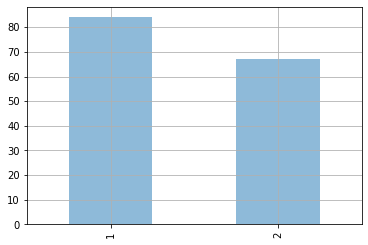

In [46]:
pokedex['n_type'].value_counts().plot(kind = 'bar', alpha = 0.5, grid = True)

## n_type of elements vs mean stat
compare each stat between pokemon that have 1 type vs 2 types.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2589b36e90>,
      dtype=object)

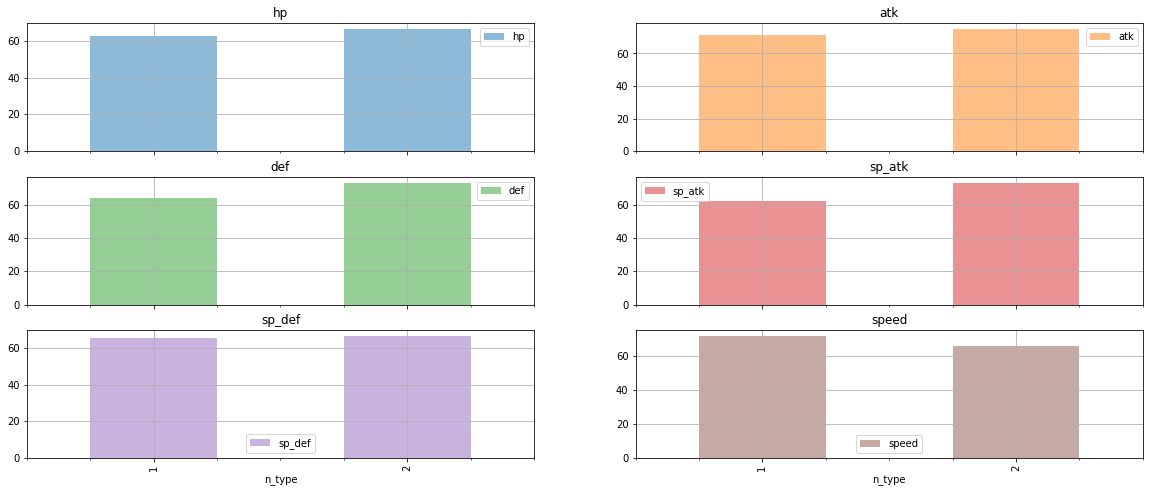

In [47]:
pokedex.groupby('n_type')[['hp', 'atk', 'def', 'sp_atk', 'sp_def', 
                                'speed']].mean().plot(kind = 'bar', 
                                                      grid = True,
                                                      subplots = True,
                                                      layout = (3, 2),
                                                      figsize = (20,8),
                                                      alpha = 0.5
                                                      )

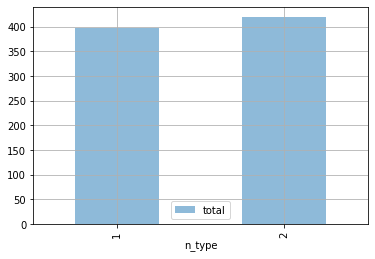

In [48]:
pokedex.groupby('n_type')[['total']].mean().plot(kind = 'bar', 
                                                      grid = True,
                                                      alpha = 0.5
                                                      )

## Histrogram of total stat

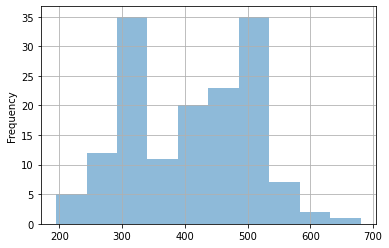

In [49]:
pokedex['total'].plot(kind = 'hist', alpha = 0.5, grid = True)

## Explore Base stat compare to type
This data are exclude all pokemon which have more than 1 type.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25897cfe90>,
      dtype=object)

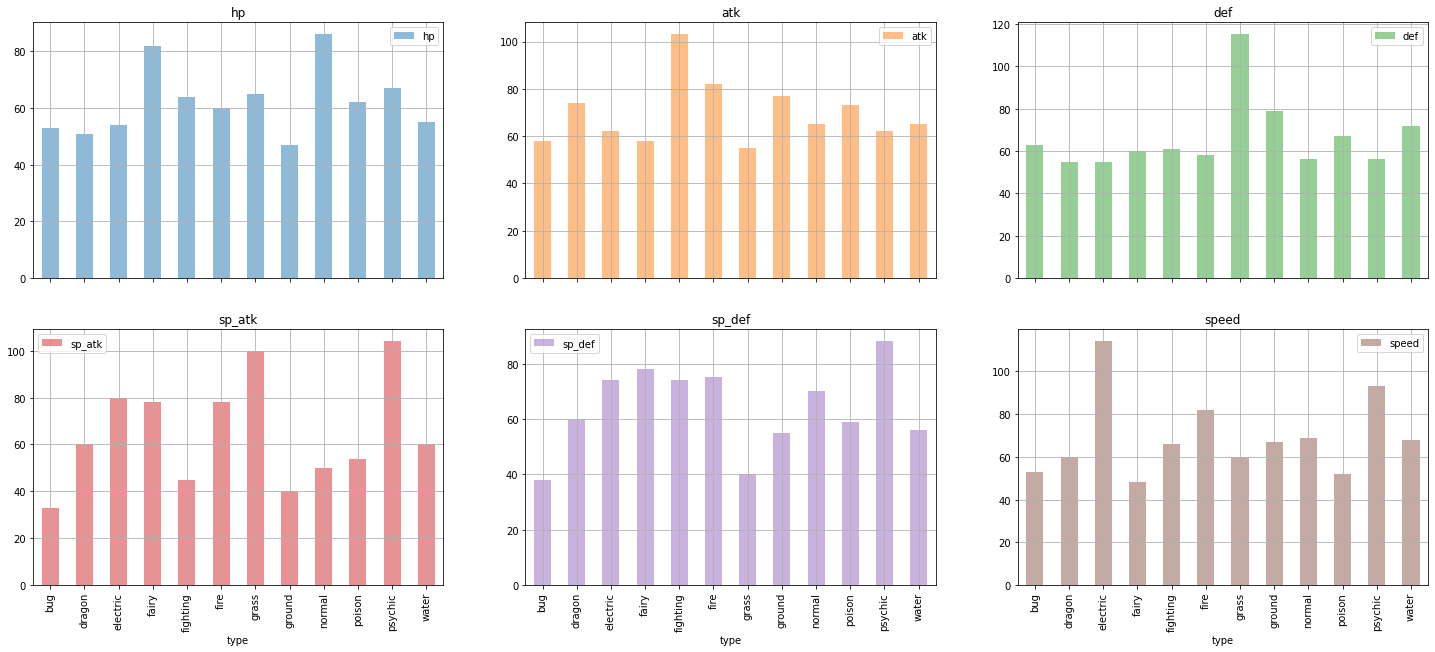

In [50]:
group_type = pokedex[~pokedex['type'].str.contains(',')].groupby('type')[
            ['hp', 'atk', 'def', 'sp_atk','sp_def', 'speed', 'total']
            ].mean().round().reset_index()
group_type.plot(kind = 'bar', x = 'type', y = ['hp', 'atk', 
                                               'def', 'sp_atk','sp_def', 
                                               'speed'],
                 alpha = 0.5, grid = True, subplots = True, layout = (3,3),
                figsize = (25,16))

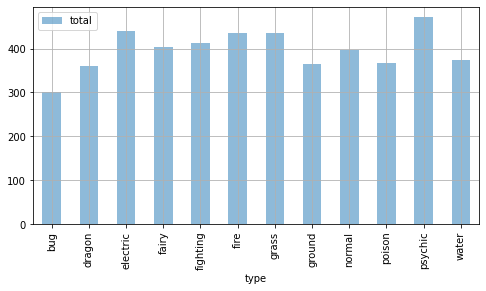

In [51]:
group_type.plot(kind = 'bar', x = 'type', y = 'total',
                 alpha = 0.5, grid = True, figsize = (8,4))

# Pokemon Evolution

In [52]:
evolve = {}
for id in range(1,last_id):
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon-species/{id}/')
    poke = response.json()
    if poke['evolves_from_species'] != None:
        evolve[id] = (poke['evolves_from_species']['name'])
    else:
        evolve[id] = (None)
    time.sleep(0.1)

In [53]:
evolution = pd.DataFrame.from_dict(evolve, orient='index', 
                                   columns = ['evolve_from'])
evolution['name'] = pokedex['name']
evolution = evolution[['name', 'evolve_from']]
evolution['evolve_from'] = np.where(evolution['evolve_from'].isnull(), 
                                    evolution['name'], evolution['evolve_from'])
evolution_chain = evolution.merge(evolution, left_on = 'evolve_from', 
                                  right_on = 'name', how = 'left')
evolution_chain = evolution_chain.drop(['name_y'], axis = 1)
evolution_chain.columns = ['name','evolve_from', 'unevolved']
evolution_chain['unevolved'] = np.where(evolution_chain['unevolved'].isna(), 
                                        evolution_chain['evolve_from'], 
                                        evolution_chain['unevolved'])
evolution_chain['evolve_level'] = np.where(evolution_chain['name'] == 
                                           evolution_chain['unevolved'], 1, 
         np.where(evolution_chain['evolve_from'] == 
                  evolution_chain['unevolved'], 2, 3))
evolution_chain['evolve_from'] = np.where(evolution_chain['evolve_from'] == 
                                          evolution_chain['name'], 
                                          None, 
                                          evolution_chain['evolve_from'])
evolution_chain

,name,evolve_from,unevolved,evolve_level
0,bulbasaur,None,bulbasaur,1
1,ivysaur,bulbasaur,bulbasaur,2
2,venusaur,ivysaur,bulbasaur,3
3,charmander,None,charmander,1
4,charmeleon,charmander,charmander,2
...,...,...,...,...
146,dratini,None,dratini,1
147,dragonair,dratini,dratini,2
148,dragonite,dragonair,dratini,3
149,mewtwo,None,mewtwo,1


In [54]:
n_evolve = evolution_chain['unevolved'].value_counts().reset_index()
evolution_chain = evolution_chain.merge(n_evolve, left_on = 'unevolved', 
                                        right_on = 'index')
evolution_chain = evolution_chain.drop('index', axis = 1)
evolution_chain.rename(columns = {'unevolved_x' : 'unevolved', 
                                  'unevolved_y':'n_evolve'}, inplace = True)
evolution_chain.astype({'evolve_level':'int64', 'n_evolve':'int64'})
evolution_chain['n_evolve'] = np.where(evolution_chain['evolve_level'] > 
                                       evolution_chain['n_evolve'], 
                                       evolution_chain['evolve_level'], 
                                       evolution_chain['n_evolve'])
evolution_chain['n_evolve'] = np.where(evolution_chain['n_evolve'] > 3, 2, evolution_chain['n_evolve'])
evolution_chain

,name,evolve_from,unevolved,evolve_level,n_evolve
0,bulbasaur,None,bulbasaur,1,3
1,ivysaur,bulbasaur,bulbasaur,2,3
2,venusaur,ivysaur,bulbasaur,3,3
3,charmander,None,charmander,1,3
4,charmeleon,charmander,charmander,2,3
...,...,...,...,...,...
146,dratini,None,dratini,1,3
147,dragonair,dratini,dratini,2,3
148,dragonite,dragonair,dratini,3,3
149,mewtwo,None,mewtwo,1,1


## Data that still Error !!!

In [55]:
evolution_chain[evolution_chain['n_evolve'] > 3]

,name,evolve_from,unevolved,evolve_level,n_evolve


## Pokemon Evolution Info


In [56]:
evolution_chain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          151 non-null    object
 1   evolve_from   83 non-null     object
 2   unevolved     151 non-null    object
 3   evolve_level  151 non-null    int64 
 4   n_evolve      151 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.1+ KB


## Explore number of evolve_level
count number of evolution level of all pokemon.



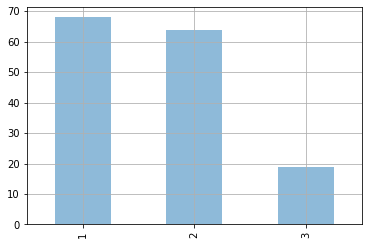

In [57]:
evolution_chain['evolve_level'].value_counts(
                ).sort_index().plot(kind = 'bar',grid = True, alpha = 0.5)

## Explore n_evolution
count and plot number on each n_evolutions.

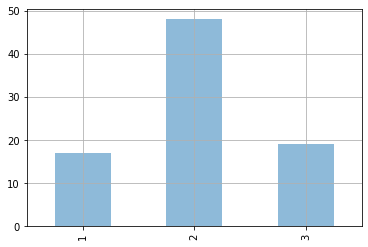

In [58]:
evolution_chain[evolution_chain['n_evolve'] == evolution_chain['evolve_level']
                ]['evolve_level'].value_counts(
                ).sort_index().plot(kind = 'bar',grid = True, alpha = 0.5)

# Merge Pokemon Detail & Pokemon Evolution

In [59]:
pokedex_info = pokedex.merge(evolution_chain, on = 'name')
pokedex_info

,name,type,n_type,hp,atk,def,sp_atk,sp_def,speed,total,evolve_from,unevolved,evolve_level,n_evolve
0,bulbasaur,"grass,poison",2,45,49,49,65,65,45,318,None,bulbasaur,1,3
1,ivysaur,"grass,poison",2,60,62,63,80,80,60,405,bulbasaur,bulbasaur,2,3
2,venusaur,"grass,poison",2,80,82,83,100,100,80,525,ivysaur,bulbasaur,3,3
3,charmander,fire,1,39,52,43,60,50,65,309,None,charmander,1,3
4,charmeleon,fire,1,58,64,58,80,65,80,405,charmander,charmander,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,dratini,dragon,1,41,64,45,50,50,50,300,None,dratini,1,3
147,dragonair,dragon,1,61,84,65,70,70,70,420,dratini,dratini,2,3
148,dragonite,"dragon,flying",2,91,134,95,100,100,80,600,dragonair,dratini,3,3
149,mewtwo,psychic,1,106,110,90,154,90,130,680,None,mewtwo,1,1


## Compare Mean stat to each evolve_level

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f258a13a050>,
      dtype=object)

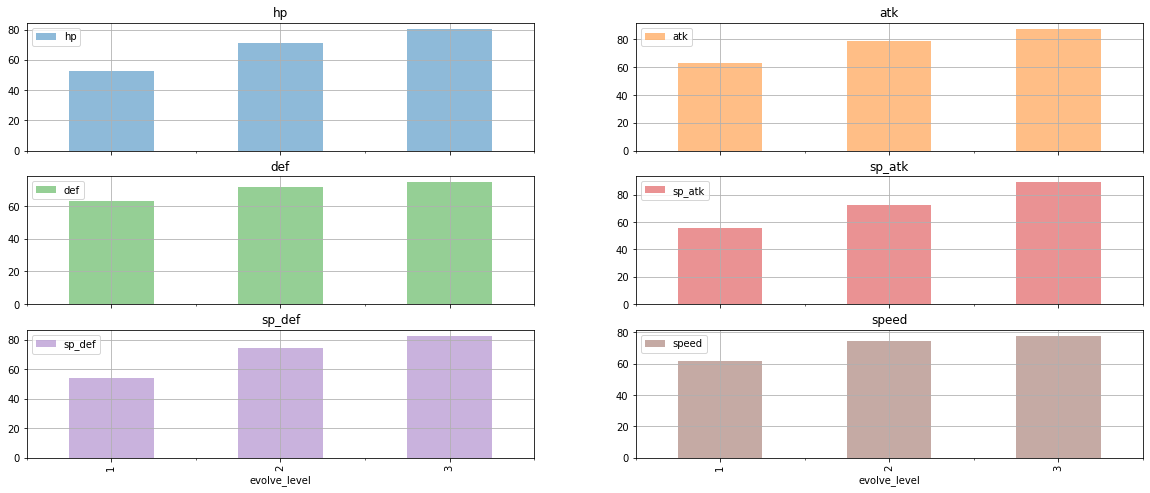

In [60]:
group_evolve_level = pokedex_info.groupby(['evolve_level'])[
    ['hp', 'atk', 'def','sp_atk', 'sp_def', 'speed', 'total']].mean()
group_evolve_level[['hp', 'atk', 'def', 'sp_atk', 'sp_def', 
                    'speed']].plot(kind = 'bar', subplots = True,
                                   layout = (3, 2),figsize = (20, 8),
                                   alpha = 0.5, grid = True)

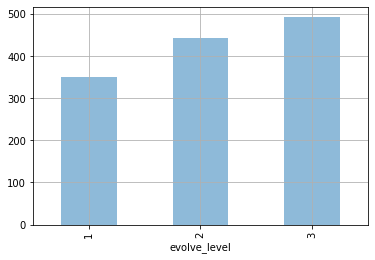

In [61]:
group_evolve_level['total'].plot(kind = 'bar', alpha = 0.5, grid = True)

## Compare Mean stat to each evolve_level and pokemon that have only unevolutioned form.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f258909fe90>,
      dtype=object)

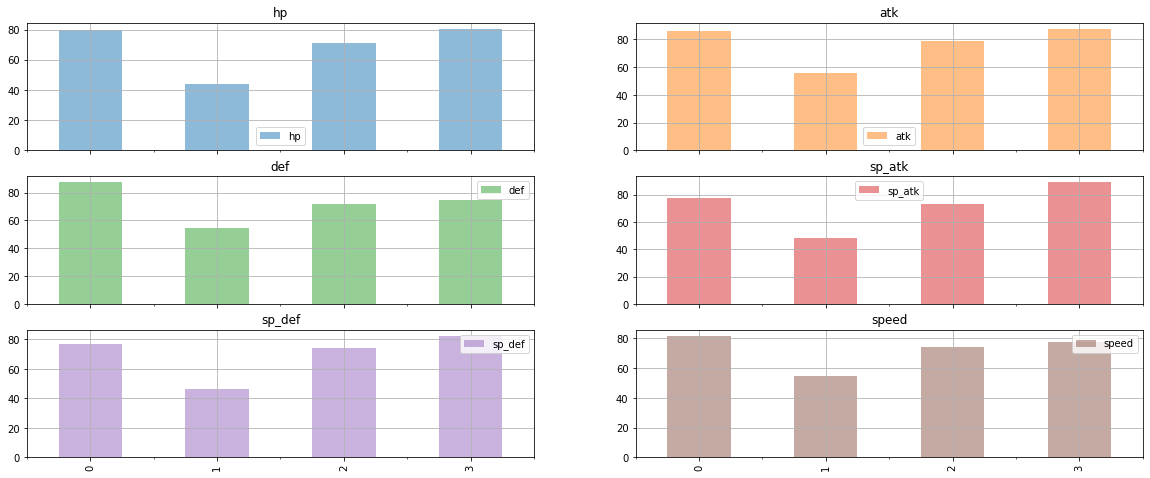

In [62]:
mean_1_evolve = pokedex_info[pokedex_info['n_evolve'] == 1][
    ['hp', 'atk', 'def','sp_atk', 'sp_def', 'speed', 'total']].mean()
mean_n_evolve = pokedex_info[pokedex_info['n_evolve'] != 1
                             ].groupby('evolve_level')[['hp', 'atk', 'def',
                                                        'sp_atk', 'sp_def', 
                                                        'speed', 'total']
                                                       ].mean().reset_index(
                                                       ).drop('evolve_level', 
                                                              axis = 1)
mean_evolve = mean_n_evolve.append(mean_1_evolve, ignore_index=True)
mean_evolve = mean_evolve.iloc[[3,0,1,2]].reset_index().drop('index', axis = 1)
mean_evolve[['hp', 'atk', 'def','sp_atk', 'sp_def', 'speed'
            ]].plot(kind = 'bar', subplots = True,layout = (3, 2), 
                   figsize = (20, 8), alpha = 0.5, grid = True)

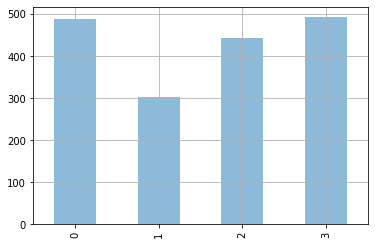

In [63]:
mean_evolve['total'].plot(kind = 'bar', alpha = 0.5, grid = True)